# <u>Sentiment Analysis for classifying RateMyProfessors reviews.</u>
## <b> Trained on Google Colab to get GPU support
## Using dataset: dataset/imdb_reviews (https://www.kaggle.com/oumaimahourrane/imdb-reviews)
## We aim to create a model that can classify a text as positive, negative or neutral.

In [10]:
# imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB
import keras
from keras import Sequential
from keras import *
from keras.layers import *
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading data
df = pd.read_csv("dataset/dataset.csv", encoding="latin-1")

In [3]:
# viewing data
df.head()

,SentimentText,Sentiment
0,"first think another Disney movie, might good, ...",1
1,"Put aside Dr. House repeat missed, Desperate H...",0
2,"big fan Stephen King's work, film made even gr...",1
3,watched horrid thing TV. Needless say one movi...,0
4,truly enjoyed film. acting terrific plot. Jeff...,1


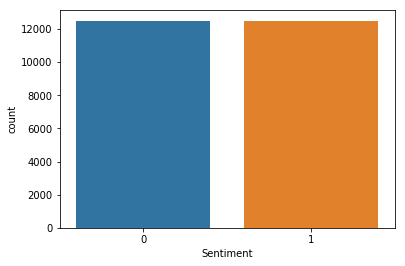

In [4]:
# counting observations
sns.countplot(x="Sentiment",data=df)

In [5]:
# Gathering features and labels for classification
features, labels = df['SentimentText'].values, df['Sentiment']

In [6]:
print ("Total number of items: ", len(features))

Total number of items:  25000


In [7]:
# performing vectorizer
vectorizer = CountVectorizer(stop_words=("english"),max_features=100) # to convert the main reviews into a matrix of shape[1]=100
tfvect = TfidfVectorizer(stop_words="english", max_features=100)

features_countvec = vectorizer.fit_transform(features)
features_tfidfvec = tfvect.fit_transform(features)

In [8]:
# splitting data into train and test
featurescv_train, featurescv_test, labelscv_train, labelscv_test = train_test_split(features_countvec, labels, shuffle=True)
featurestf_train, featurestf_test, labelstf_train, labelstf_test = train_test_split(features_tfidfvec, labels, shuffle=True)

In [ ]:
# building network
# after multiple attempts to prevent overfitting, this was the most apt model created
model = Sequential()
model.add(Dense(32, input_dim=featurescv_train.shape[1], activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(32, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss=keras.losses.binary_crossentropy, metrics=['acc'])


# early stopping to get the best results possible
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [ ]:
# training and evaluating
model.fit(featurescv_train, labelscv_train, epochs=10, validation_data=(featurescv_test, labelscv_test), callbacks=[es])

In [ ]:
model.save("model.h5")

In [43]:
# reviews converted to the required matrix (*,100)
def get_results(reviews):
    
    predictions = model.predict(reviews).round()
    pos = 0
    neg = 0
  
    for i in predictions:
        if i[0] == 1:# positive
            pos+=1
        else:
            neg+=1
   
  
    analysis = ""
    if pos >= neg:
        analysis="GOOD!"
    else:
        analysis = "BAD!"
   
  
    return {"pos":pos, "neg":neg, "analysis":analysis}
  

In [45]:
from keras.models import load_model

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               9628288   
_________________________________________________________________
dense_6 (Dense)              (None, 120)               15480     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                7744      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 9,651,577
Trainable params: 9,651,577
Non-trainable params: 0
_________________________________________________________________


In [49]:
model = load_model("model1.h5")

In [50]:
x = load_model("model1.h5")

In [51]:
x.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 32)                3232      
_________________________________________________________________
dropout_26 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_27 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_28 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 65        
Total para

In [52]:
model = load_model("model1.h5")

In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 32)                3232      
_________________________________________________________________
dropout_26 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_27 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_28 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 65        
Total para

In [56]:
model.save_weights("model1.weights")